In [1]:
# imports
import os
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np
import PIL 
import wordcloud 

from os import path
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from matplotlib.pyplot import figure

In [2]:
year = 2020 # available: from 2015 to 2020
PATH_DATA = './data/'
QUOTES_FILE = PATH_DATA + f'quotes-{year}-filtered.json.bz2'
CHUNK_SIZE = 1000

reader = pd.read_json(QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')

i=0
for chunk in reader:
    if i: 
        df_0 = chunk
        break
    else: i=1

df_0

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
1000,2020-01-21-055594,"My narcissist brain goes, `Yes, I'm Ms. Cuoco....",Kaley Cuoco,[Q16759],2020-01-21 11:42:56,1,"[[Kaley Cuoco, 0.7276], [None, 0.2724]]",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E
1001,2020-01-08-053366,"My resistance is lower than most of you, of co...",Alex Trebek,[Q929985],2020-01-08 21:43:00,4,"[[Alex Trebek, 0.6683], [Harry Friedman, 0.206...",[http://feeds.cbsnews.com/~r/CBSNewsEntertainm...,E
1002,2020-01-10-055817,My sense was Gina hired me but she wasn't sure...,Perry Pearn,[Q6378096],2020-01-10 23:54:33,7,"[[Perry Pearn, 0.7942], [None, 0.2058]]",[http://www.capebretonpost.com/sports/hockey/p...,E
1003,2020-01-24-059369,"Naturally, that turns more personal, more ther...",Kelsea Ballerini,[Q18637137],2020-01-24 19:00:07,1,"[[Kelsea Ballerini, 0.5112], [None, 0.4888]]",[http://wincountry.com/news/articles/2020/jan/...,E
1004,2020-01-13-049477,Neither my mother nor I have ever participated...,None,[],2020-01-13 20:56:13,1,"[[None, 0.9301], [Kabir Suman, 0.0699]]",[http://telegraphindia.com/states/west-bengal/...,E
...,...,...,...,...,...,...,...,...,...
1995,2020-01-16-027654,I am super excited about this project as it's ...,Monica Dogra,[Q6899937],2020-01-16 15:45:07,1,"[[Monica Dogra, 0.9424], [None, 0.0576]]",[http://glamsham.com/en/a-married-woman-ridhi-...,E
1996,2020-01-21-026967,I did look at Sherry Lansing and all those wom...,Victoria Alonso,[Q24176186],2020-01-21 17:36:52,1,"[[Victoria Alonso, 0.8733], [None, 0.1267]]",[http://www.btlnews.com/awards/power-sound-mps...,E
1997,2020-01-15-028927,"I disagreed. Bernie is my friend, and I am not...",Elizabeth Warren,[Q434706],2020-01-15 12:08:48,2,"[[Elizabeth Warren, 0.8726], [None, 0.1109], [...",[https://www.towleroad.com/2020/01/elizabeth-w...,E
1998,2020-02-19-028680,I feel great. I like being here with my sister...,Lisa Robinson,"[Q22280070, Q56811155]",2020-02-19 05:25:41,1,"[[Lisa Robinson, 0.5514], [None, 0.4486]]",[https://www.nbcdfw.com/news/health/8-year-old...,E


In [3]:
text = ""

for quote in df_0.quotation:
    text = text + ' ' + quote

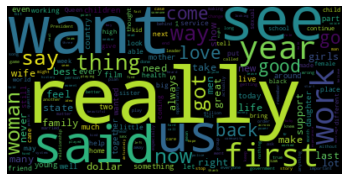

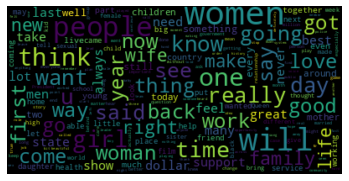

In [16]:
#Generating a square wordcloud from the US constitution using default arguments.
stopwords = ["women", "people", "going", "think", "will", "u", "one", "girl", "know", "day", "time", "really"] + list(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

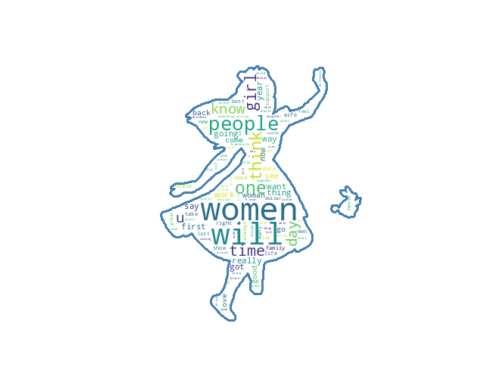

<Figure size 432x288 with 0 Axes>

In [17]:
# Word Cloud without stopwords 
figure(figsize=(8, 6), dpi=80)
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()

<Figure size 432x288 with 0 Axes>

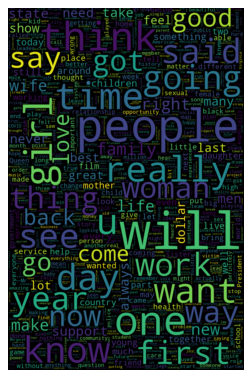

<Figure size 432x288 with 0 Axes>

In [19]:
# Word Cloud without stopwords 
figure(figsize=(8, 6), dpi=80)
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
women_mask = np.array(Image.open(path.join(d, "women_symbol.png")))

stopwords = set(STOPWORDS)
stopwords.add("women")

wc = WordCloud(background_color="black", max_words=2000, mask=women_mask,
               stopwords=stopwords, contour_width=1, contour_color='white')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "women_symbol.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()